In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Генерирование гауссовских случайных процессов

## 2. Генерирование с помощью стохастического интегрирования

Если вам нужно сгенерировать потенциально бесконечную реализацию гауссовского случайного процесса $X = (X_t)_{t \geqslant 0}$, можно воспользоваться тем фактом, что многие процессы "управляются" броуновским движением и могут быть заданы как стохастические интегралы по броуновскому движению.

Стохастический интеграл от неслучайной функции $b(t)$ по броуновскому движению $B = (B_t)_{t \geqslant 0}$ - это величина
$$
\int \limits _0 ^t b(s) dB_s,
$$
где $dB_s$ - приращение $B_t$ в точке $s$. Этот интеграл определяется и вычисляется как предел сумм
$$
\int \limits _0 ^t b(s) dB_s \approx \sum \limits_{i = 1} ^n b(s_i) \Delta B_{s_i},
$$
где $\Delta B_{s_i}$ - приращение "назад" броуновского движения, равное $\Delta B_{s_i} = B_{s_i} - B_{s_{i-1}}$.

Известно, что $B_{s_i} - B_{s_{i-1}} \sim N(0, s_i - s_{i - 1})$.

Многие стохастические процессы могут быть записаны в виде
$$
X_t = \int \limits _0 ^t a(s) ds + \int \limits _0 ^t b(s) dB_s
$$
или, что эквивалентно, в дифференциалах
$$
dX_t = a(t) dt + b(t) dB_t.
$$
Это позволяет вычислять их траектории с помощью стохастического интегрирования.

### 1.1. Винеровский процесс

Рассмотрим этот подход на примере простого броуновского движения $B = (B_t)_{t \geqslant 0}$. Для этого процесса очевидно равенство
$$
B_t = \int \limits _0 ^t dB_s \approx \sum \limits _{i=1} ^n \Delta B_{t_i}
$$
Где $\Delta B_{t_i} \sim N(0, \Delta)$, $t_i = \Delta i, i = 1, \ldots, 1000, \Delta = 10^{-2}$.

In [22]:
timestamps = timestamps = np.linspace(1e-2, 10, 1000)

dbm = np.random.normal(size=1000)
bm = 1e-1 * np.cumsum(dbm)

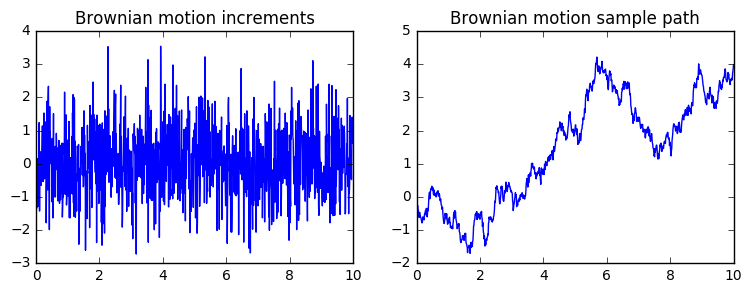

In [23]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, dbm)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, bm)
title('Brownian motion sample path')

### 1.2. Фрактальное броуновское движение

Этого я вам не покажу, потому что оно пошло в домашнее задание.

### 1.3. Процесс Орнштейна-Уленбека

Процесс Орнштейна-Уленбека удовлетворяет (общему) стохастическому дифференциальному уравнению вида 
$$
dX_t = \theta (\mu - X_t) dt + \sigma dB_t.
$$
Дополнительно задается $X_0 = x_0$ - точка, откуда выпускается процесс.

В предыдущей презентации $\sigma = 1, \theta = 1, \mu = 0$, и  стохастическое дифференциальное уравнение имело вид
$$
dX_t = - X_t dt + dB_t.
$$

Рассмотрим разностную схему для вычисления этого интеграла:
$$
X_{i + 1} - X_i = \theta (\mu - X_i) \Delta t_i + \sigma \Delta B_i.
$$
Здесь $X_i = X_{t_i}, B_i = B_{t_i}$.

In [30]:
timestamps = np.linspace(0.01, 10, 1000)
dt = 1e-2
x_0 = 2.
sigma = 0.1
mu = 1.2
theta = 1.
dbm = np.random.normal(size=1000)
ou = np.zeros_like(dbm)
ou[0] = x_0
for i in xrange(1, len(dbm)):
    ou[i] = ou[i - 1] + theta * (mu - ou[i - 1]) * dt + sigma * dbm[i] * np.sqrt(dt)

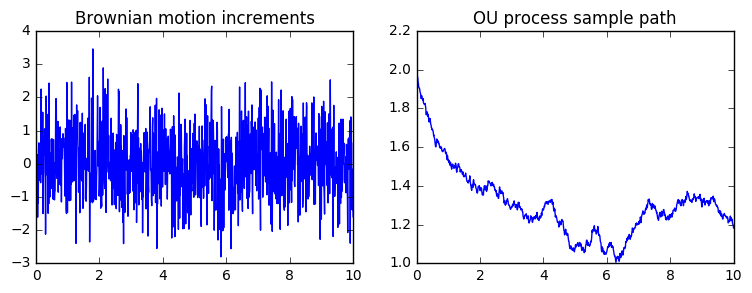

In [31]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, dbm)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, ou)
title('OU process sample path')